<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Object Oriented Programming: Coding a Linear Regression Class


---

## Learning Objectives

### Core
- Apply object oriented programming concepts to build a linear regression class by hand:
  - Starting a basic python class
  - Adding a class function
  - Assigning attributes during instantiation
  - Add a function to add an intercept to the X matrix if necessary
  - Instantiate the class
  - Add the predict function
  - Add a score function
- Verify your class against the sklearn LinearRegression implementation.

### Target
- How to inspect a class
- Go through some special class methods

### Lesson Guide
- [Review the linear algebra derivation of coefficients for MLR](#review-mlr)
- [Load the simple housing data](#load-data)
- [Classes and objects](#classes-objects)
- [Coding our own `LinearRegression` class](#coding-lr)
    - [Starting a basic python class](#starting-class)
    - [Adding a class function](#class-function)
    - [Assigning attributes during instantiation](#init-args)
    - [Add another function to add an intercept](#intercept-adder)
    - [Instantiate the class](#instantiate)
    - [Add a predict function](#predict)
    - [Add a score function](#score)
- [Verify your class against the sklearn implementation](#verify)
- [Inspecting a class](#inspection)
- [Some special class methods](#special)

## Review: solving for the coefficients that minimize the loss

---

### The "least squares" solution to linear regression

**Step 1:** With target vector $y$ and prediction matrix $X$, we can formulate a regression as:

$$ y = X \beta  + \epsilon $$

where $\beta$ is our vector of coefficients and $\epsilon$ is our vector of residuals.

**Step 2:** We can equivalently formulate this as a calculation of the residuals:

$$ \epsilon = y - X \beta $$

*Our goal is to minimize the sum of squared residuals.* This is also known as the "least squares loss function". 

**Step 3:** Solve for the sum of squared residuals on the left hand side of the equation. Recall the vector of errors are equivalent to the residuals. The sum of squared residuals is represented as the dot product of the vector of residuals.

$$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon^T \epsilon
$$

Therefore we can write the sum of squared residuals as:

$$ \epsilon^T \epsilon = (y-X \beta)^T (y-X \beta) $$

Which becomes:

$$ \epsilon^T \epsilon = y^Ty - y^TX\beta - \beta^T X^T y + \beta^T X^T X \beta $$

**Step 4:** We want to find the coefficients where the loss function will be minimal. In this case we can use calculus, taking the derivative with respect to the $\beta$ vector:

$$ \frac{\partial \epsilon^T \epsilon}{\partial \beta} = 
-2X^Ty + 2X^TX\beta$$


Since want to minimize loss function and the loss function is convex, we set the derivative to zero and solve for the beta coefficient vector:

$$ 0 = -2X^T y + 2X^T X\beta \\
X^T X\beta = X^Ty \\
\beta = (X^T X)^{-1}X^T y$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the simple housing data

---

This dataset only has 4 columns. We can formulate simple regression problems with it to test our linear regression class down the line.

In [2]:
house = pd.read_csv('../../../../resource-datasets/housing_data/housing-data.csv')

In [3]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [4]:
house.shape

(47, 4)

## Classes and objects

---

In python, everything is an "object" of some type. This is the basis of what is known as **Object Oriented Programming (OOP)**.

A *class* is a type of object. You can think of a class definition as a sort of "blueprint" that specifies the construction of a new object when instantiated.

> **Note:** Knowing how to define and use classes is essential to programming python at an intermediate or advanced level. I will cover the basics here, which will help you understand how things like `LinearRegression` in sklearn work.


## Coding our own version of the sklearn `LinearRegression` class

---

By now you are familiar with the `LinearRegression` class in sklearn. We will walk through the re-creation of this class (albeit a simplified version).

### 1. Starting a basic python class

Below is the beginning of our class blueprint:

In [5]:
class SimpleLinearRegression:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

What are the components of this?

**`class`**

- The `class` is like `def`, but instead of defining a function it defines a class.

**`def __init__(self)`**

- The `def __init__(self):` is our class' initialization function. This function is called when you instantiate the class by typing `SimpleLinearRegression()`

**`self`**

- `self` is the first argument to class definitions. It is a variable that refers to the **current instantiation of the class**. What does this mean? When you instantiate a class and assign it to a variable with `slr = SimpleLinearRegression()`, the `self` argument is now a reference to the current instantiation of the class `slr`. Now, when you use a function that is part of the class, it knows to use that specific object's function. This lets you have multiple instantiations of a class with the same function name.

**class attributes**

- `self.coef_` and `self.intercept_`, likewise, are "attributes" (variables) that are connected to the instantiation of the class. When self becomes `slr`, for example, the `self` becomes `slr` and `self.coef_` becomes `slr.coef`

---

### 2. Adding a class function

Now, just like with `__init__`, we can add functions to the class.

**Let's add a `fit()` method that will calculate the coefficients for a linear regression.**
- The function should have arguments `self`, `X` and `y`.
- Use the linear algebra equations above to calculate the coefficients and intercept.
- Assign the coefficients to `self.coef_` and the intercept to `self.intercept_`.

In [6]:
class SimpleLinearRegression:
    
    def __init__(self, coef_, intercept_):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        
        self.coef_ = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
        # betas = (X^T X)^-1 X^T Y
        
        pass

In [8]:
my_reg = SimpleLinearRegression(None, None)

In [9]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [10]:
X=house[["sqft","bdrms","age"]]

y=house["price"]

In [12]:
my_reg.fit(X,y)

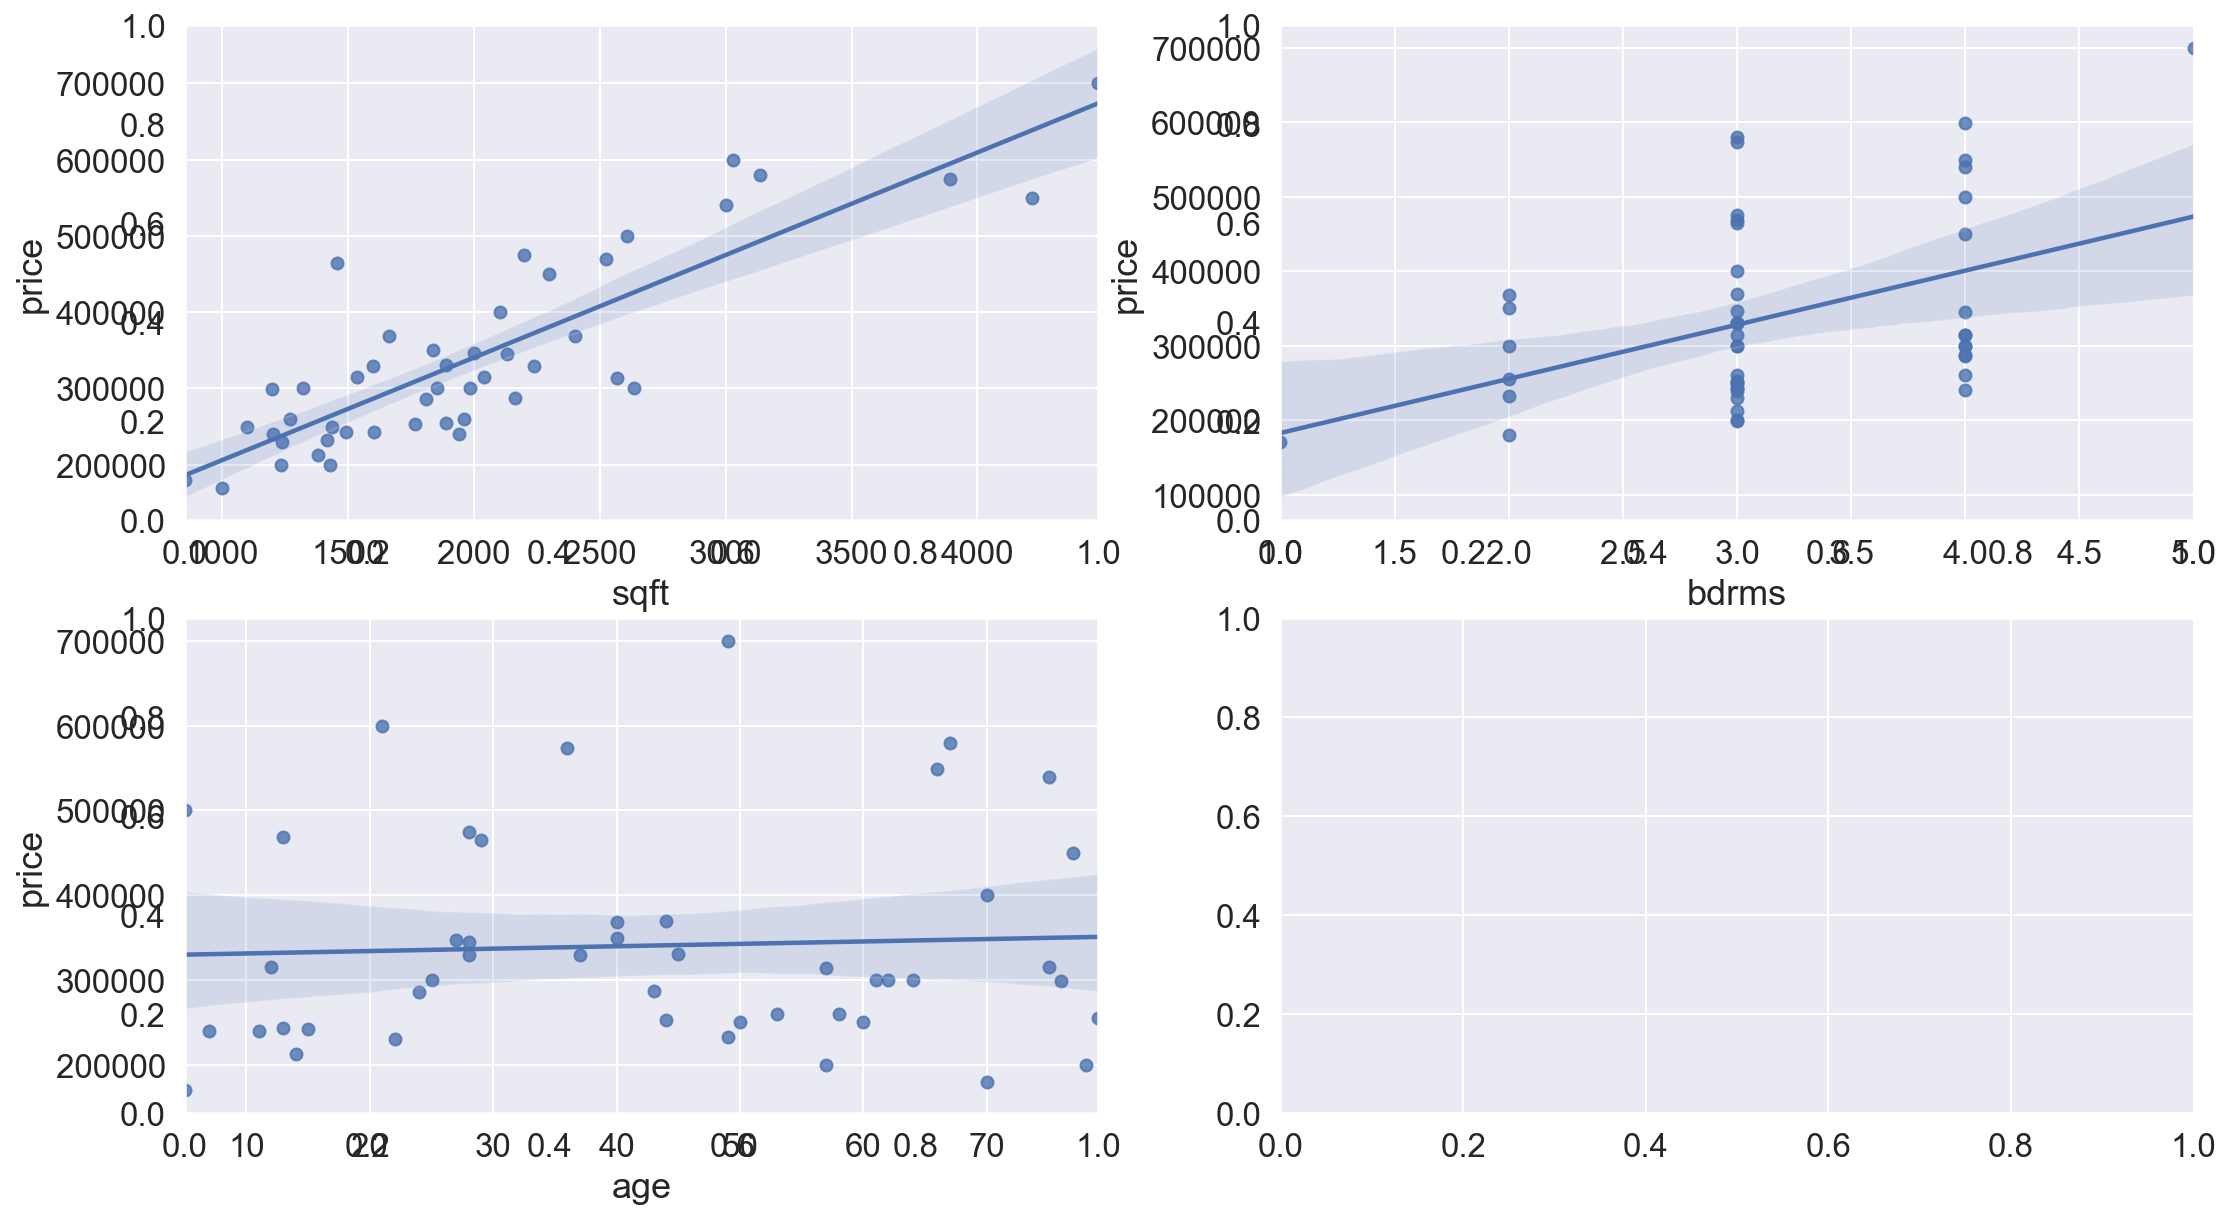

In [37]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(18,10), sharex=False, sharey=False,)
sns.regplot(x = house["sqft"], y =house["price"],  data=house, ax=fig.add_subplot(2,2,1),)
sns.regplot(x = house["bdrms"], y =house["price"],  data=house, ax=fig.add_subplot(2,2,2) )
sns.regplot(x = house["age"], y =house["price"],  data=house, ax=fig.add_subplot(2,2,3))
plt.show()

Notice how we assigned `self.coef_` inside of the `fit()` function.

This will set the class attribute `self.coef_`, and this attribute can be accessed by _any other function in the class without passing it as an argument!_

It can also be accessed by you after instantiating the class.

---

### 3. Assigning attributes during instantiation

There is an issue here - we may pass an `X` matrix in without an intercept. 

**Add a keyword argument to the `__init__` function which will specify whether the `X` matrix should have an intercept added or not.**

In [44]:
class SimpleLinearRegression:
    def __init__(self, fit_intercept=True):
        self.coef_ = 45
        self.fit_intercept = fit_intercept
    
    pass

In [51]:
model = SimpleLinearRegression()

In [52]:
model.fit_intercept

True

In [53]:
print(SimpleLinearRegression.__dict__)

{'__module__': '__main__', '__init__': <function SimpleLinearRegression.__init__ at 0x136e7fa70>, '__dict__': <attribute '__dict__' of 'SimpleLinearRegression' objects>, '__weakref__': <attribute '__weakref__' of 'SimpleLinearRegression' objects>, '__doc__': None}


**Now, if we instantiate the class, it will assign `fit_intercept` to the class attribute `fit_intercept`. Try it out:**

In [54]:
model = SimpleLinearRegression(1)

In [55]:
model.fit_intercept

1

In [56]:
model.coef_

45

---

### 4. Add a function to add an intercept to the `X` matrix if necessary

This function will be called from inside the `fit` function and run conditional on the value of `self.fit_intercept`.

In [ ]:
class SimpleLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        
    def add_intercept(self, X):
        pass
        
    def fit(self, X, y):
        pass

---

### 5. Instantiate the class

At this point we can try out our class. 

**Instantiate the class and try out the coefficient fitting function on the housing data.**

In [ ]:
y = house.price.values
X = house[['sqft', 'bdrms', 'age']].values

Like in the sklearn `LinearRegression` class, we now have access to the assigned `coef_` and `intercept_` attributes after fitting the model.

---

### 6. Add the `predict` function.

Let's add some more of the class methods that are in the real `LinearRegression` class.

**First, add the `predict` function. It will take a design matrix `X` and return predictions for those rows.**

In [ ]:
class SimpleLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        
    def add_intercept(self, X):
        pass
        
    def fit(self, X, y):
        pass
        
    def predict(self, X):
        pass

**Test out the predict function.**

---

### 7. Add a `score` function

This will calculate the $R^2$ of your model on a provided `X` and `y`.

> **Note:** You'll probably want to write a helper function to calculate the sum of squared errors, since this will be run for both the baseline model and the regression model in order to calculate the $R^2$.

In [ ]:
class SimpleLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        
    def add_intercept(self, X):
        pass
    
    def fit(self, X, y):
        pass
        
    def predict(self, X):
        pass
    
    def score(self, X, y):
        pass

### Verify your class against the sklearn `LinearRegression` implementation.

---

Our class should return the same results for the $R^2$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

### Inspecting a class

---

When we want to know more about a class object, we can use the "inspect" module. Specifically the `inspect.getmembers()` function takes an instantiated class as an argument and returns an information dictionary.

This can be helpful to know what attributes and methods are avaiable and basically, the blueprint of a class object in memory.  Depending on the way the class was implemented, you can usually find useful information hiding inside of `slr.__class__.__dict__` -- which can be easier to look at.  The "right way" is to use the "inspect" module.

In [ ]:
import inspect

In [ ]:
inspect.getmembers(lr)

## Additional Resources
---


See more on [Tutorials Point](https://www.tutorialspoint.com/python3/python_classes_objects.htm).